# Segundo examen parcial

In [27]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import numpy as np
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image  
from sklearn import tree
import pydotplus



## Cargamos el set de datos

### Data Set Information

URL : [wine_data](https://archive.ics.uci.edu/ml/datasets/wine)

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set. 

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it ) 
1. Alcohol 
2. Malic acid 
3. Ash 
4. Alcalinity of ash 
5. Magnesium 
6. Total phenols 
7. Flavanoids 
8. Nonflavanoid phenols 
9. Proanthocyanins 
10. Color intensity 
11. Hue 
12. OD280/OD315 of diluted wines 
13. Proline

In [28]:
wine_data = datasets.load_wine()

In [29]:
X_train = wine_data.data
Y_train = wine_data.target

## k-nearest neighbors

In [30]:
#### INGRESA TU CODIGO AQUI  ~ 2 lineas de codigo ######
kneigh = KNeighborsClassifier()
kneigh.fit(X_train,Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Accuracy

In [31]:
## EJECUTA LA CELDA, NO HAY QUE CAMBIAR NADA ##
y_pred = kneigh.predict(X_train)

accuracy_score(Y_train, y_pred)

0.7865168539325843

# Regresion logistica

In [32]:
## Ingresa el numero de iteraciones ##
numero_maximo_iteraciones = 500

In [33]:
#### INGRESA TU CODIGO AQUI  ~ 2 lineas de codigo ######
## utiliza la variable numero_maximo_iteraciones ##
logistic_classifier = LogisticRegression(max_iter=numero_maximo_iteraciones)
logistic_classifier.fit(X_train, Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Accuracy

# Desicion trees

** Importante: ** Tener instalado el paquete graphviz

In [34]:
y_pred = logistic_classifier.predict(X_train)

## Imprime el accuracy para el modelo de regresion logistica ##
#### INGRESA TU CODIGO AQUI  ~ 1 linea de codigo ######
calificacion1=accuracy_score(Y_train,y_pred)
calificacion2=logistic_classifier.score(X_train, Y_train)

print(calificacion1)
print(calificacion2)

0.9719101123595506
0.9719101123595506


In [35]:
#### INGRESA TU CODIGO AQUI  ~ 2 lineas de codigo ######
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, Y_train)

### Accuracy

In [37]:
## Imprime el accuracy para el desicion tree ##
#### INGRESA TU CODIGO AQUI  ~ 2 lineas de codigo ######
y_pred = decision_tree.predict(X_train)

S1 = accuracy_score(Y_train,y_pred)
S2 = logistic_classifier.score(X_train, Y_train)

print (S1)
print (S2)




1.0
0.9719101123595506


### Visualiza el desicion tree

En la siguiente celda imprime el desicion tree, como lo vimos en la clase.
Puedes consultar [aqui](https://youtu.be/axCtUSHe30Y?t=1180)

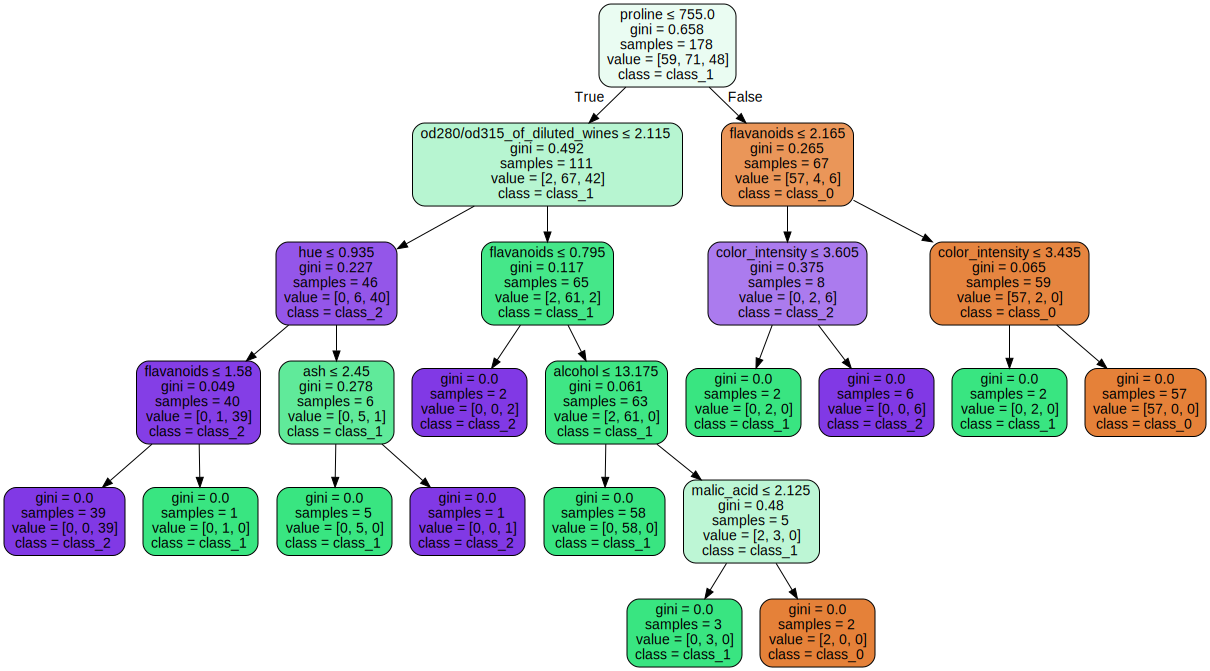

In [43]:
#### INGRESA TU CODIGO AQUI  ~ 3 lineas de codigo ######
dot_data = tree.export_graphviz(decision_tree,out_file = None,feature_names = wine_data.feature_names,class_names = wine_data.target_names,filled = True, rounded = True,special_characters = True)
graph=graphviz.Source(dot_data)
graph

# Predicciones

In [ ]:
## EJECUTA LA CELDA, NO HAY QUE CAMBIAR NADA ##
for i in range(len(Y_train[:50])):
    prediction_logistic = logistic_classifier.predict(X_train[i].reshape(1,-1))
    prediction_kneigh = kneigh.predict(X_train[i].reshape(1,-1))
    prediction_decision_tree = decision_tree.predict(X_train[i].reshape(1,-1))
    real = Y_train[i]
    print("Real:",real,"Regresion Logistica",prediction_logistic, \
          "K-nearest neighbors",prediction_kneigh, \
          "Decision Tree", prediction_decision_tree)

# Predicciones diferentes

In [ ]:
## EJECUTA LA CELDA, NO HAY QUE CAMBIAR NADA ##
exit_flag = 0

for i in range(len(Y_train)):
    prediction_logistic = logistic_classifier.predict(X_train[i].reshape(1,-1))
    prediction_kneigh = kneigh.predict(X_train[i].reshape(1,-1))
    prediction_decision_tree = decision_tree.predict(X_train[i].reshape(1,-1))
    real = Y_train[i]
    if( (real!= prediction_logistic) or (real!= prediction_kneigh) or (real!= prediction_decision_tree) ):
        print("Regresion Logistica",prediction_logistic, \
          "K-nearest neighbors",prediction_kneigh, \
          "Decision Tree", prediction_decision_tree)
        exit_flag+= 1
        if (exit_flag == 5):
            break

## Utilizando las predicciones de los tres modelos, para cada uno de los ejemplos, ¿Que clasificación le darías, si no todos los modelos dan el mismo resultado? 

## En la siguiente celda da una conclusión para cada ejemplo

In [21]:
print('Considero que el modelo S1 es más efectivo ya que tiene un accuracy score más alto en comparación a S2.El cual es mucho mejor mientras más se acerque a 1. ')

Considero que el modelo S1 es más efectivo ya que tiene un accuracy score más alto en comparación a S2.El cual es mucho mejor mientras más se acerque a 1. 
